In [1]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
x_train/=255
x_test/=255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
model = Sequential()
model.add(Conv2D(28,kernel_size = (3,3),input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2080 - accuracy: 0.9377
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0845 - accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0569 - accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0446 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0359 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0281 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0251 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0217 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0188 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0647 - accuracy: 0.9851


[0.06469330936670303, 0.9850999712944031]

1/1 [==============================] - 0s 54ms/step
6


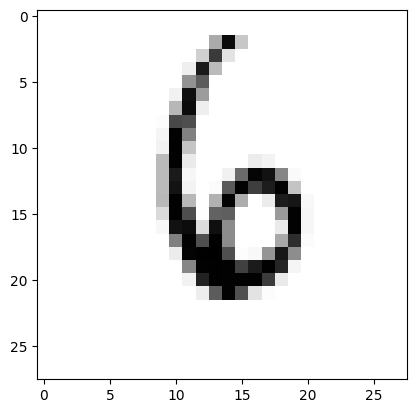

In [10]:
import matplotlib.pyplot as plt
image_index=6900
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())

In [11]:
from sklearn.metrics import classification_report
import numpy as np

In [26]:
# Step 1: Predict class probabilities on the test set
y_pred_prob = model.predict(x_test)

# Step 2: Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Step 3: Print classification report
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000

